<a href="https://colab.research.google.com/github/pablozap/regression-model-for-exercise_sns-dataset/blob/main/heart_rate_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Understanding

## Carga de Datos

In [2]:
import seaborn as sns
import pandas as pd

df = sns.load_dataset("exercise")
df

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest
...,...,...,...,...,...,...
85,85,29,no fat,135,15 min,running
86,86,29,no fat,130,30 min,running
87,87,30,no fat,99,1 min,running
88,88,30,no fat,111,15 min,running


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  90 non-null     int64   
 1   id          90 non-null     int64   
 2   diet        90 non-null     category
 3   pulse       90 non-null     int64   
 4   time        90 non-null     category
 5   kind        90 non-null     category
dtypes: category(3), int64(3)
memory usage: 2.9 KB


## Resumen estadistico

In [4]:
print("Statistical summary of numerical columns:")
display(df.describe())

Statistical summary of numerical columns:


,Unnamed: 0,id,pulse
count,90.000000,90.000000,90.000000
mean,44.500000,15.500000,99.700000
std,26.124701,8.703932,14.858471
min,0.000000,1.000000,80.000000
25%,22.250000,8.000000,90.250000
50%,44.500000,15.500000,96.000000
75%,66.750000,23.000000,103.000000
max,89.000000,30.000000,150.000000


In [5]:
print("Information about the DataFrame:")
df.info()

Information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  90 non-null     int64   
 1   id          90 non-null     int64   
 2   diet        90 non-null     category
 3   pulse       90 non-null     int64   
 4   time        90 non-null     category
 5   kind        90 non-null     category
dtypes: category(3), int64(3)
memory usage: 2.9 KB


## Visualización

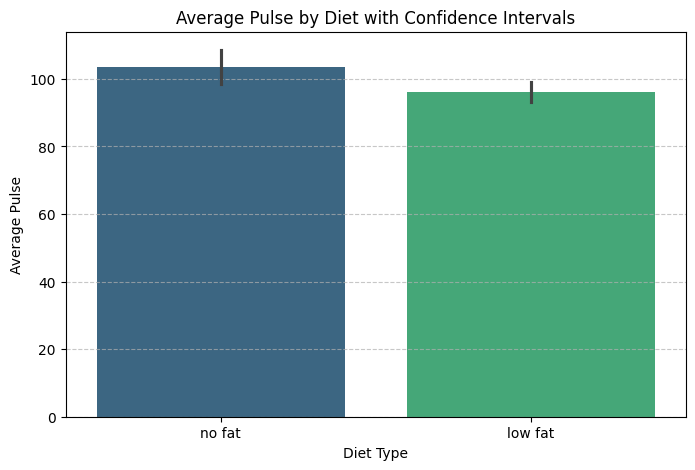

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for Pulse by Diet with confidence intervals
plt.figure(figsize=(8, 5))
sns.barplot(x='diet', y='pulse', data=df, palette='viridis', hue='diet', legend=False)
plt.title('Average Pulse by Diet with Confidence Intervals')
plt.xlabel('Diet Type')
plt.ylabel('Average Pulse')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

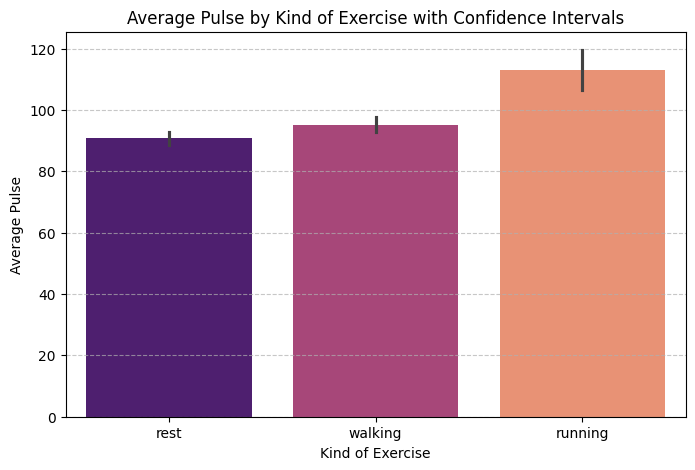

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for Pulse by Kind of Exercise with confidence intervals
plt.figure(figsize=(8, 5))
sns.barplot(x='kind', y='pulse', data=df, palette='magma', hue='kind', legend=False)
plt.title('Average Pulse by Kind of Exercise with Confidence Intervals')
plt.xlabel('Kind of Exercise')
plt.ylabel('Average Pulse')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

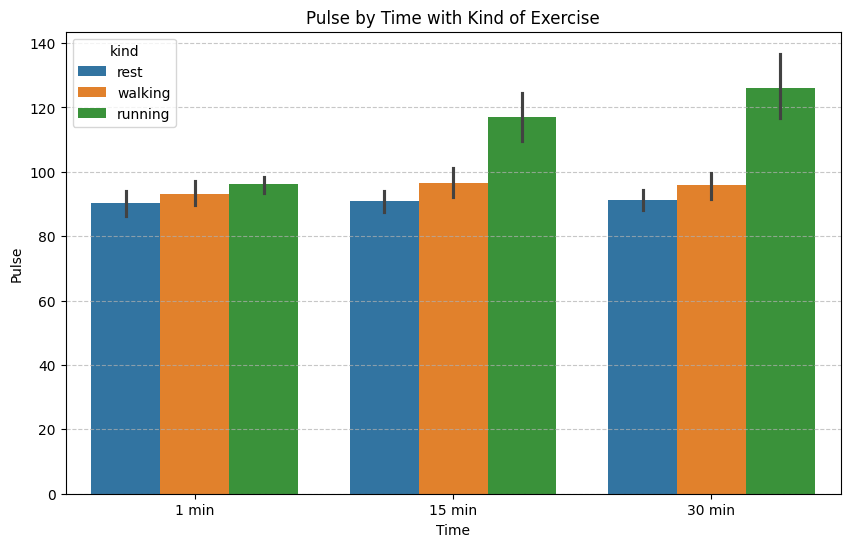

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='time', y='pulse', data=df, hue='kind')
plt.title('Pulse by Time with Kind of Exercise')
plt.xlabel('Time')
plt.ylabel('Pulse')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

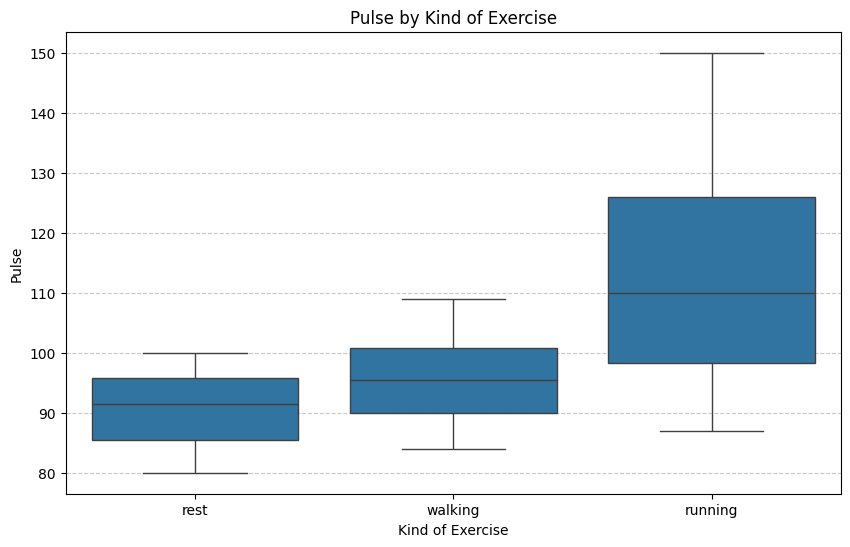

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='kind', y='pulse', data=df)
plt.title('Pulse by Kind of Exercise')
plt.xlabel('Kind of Exercise')
plt.ylabel('Pulse')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

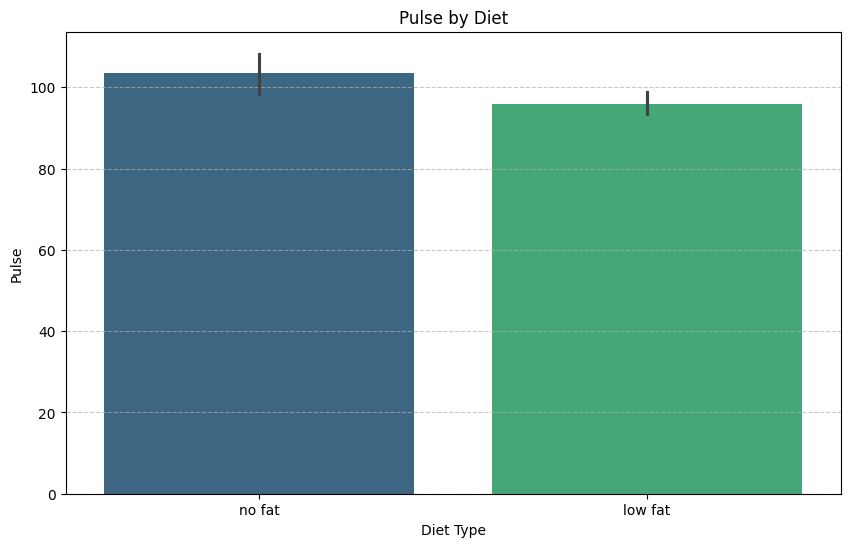

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='diet', y='pulse', data=df, palette='viridis', hue='diet', legend=False)
plt.title('Pulse by Diet')
plt.xlabel('Diet Type')
plt.ylabel('Pulse')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Data Preparation

In [11]:
df_fixed = df.drop(['Unnamed: 0', 'id'], axis=1)
df_fixed

,diet,pulse,time,kind
0,low fat,85,1 min,rest
1,low fat,85,15 min,rest
2,low fat,88,30 min,rest
3,low fat,90,1 min,rest
4,low fat,92,15 min,rest
...,...,...,...,...
85,no fat,135,15 min,running
86,no fat,130,30 min,running
87,no fat,99,1 min,running
88,no fat,111,15 min,running


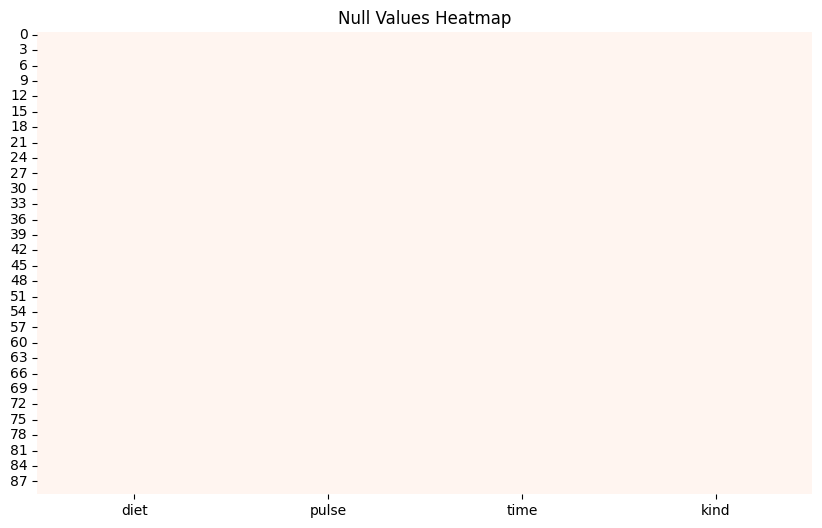

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df_fixed.isnull(), cbar=False, cmap='Reds')
plt.title('Null Values Heatmap')
plt.show()

In [13]:
print("Number of null values per column:")
display(df_fixed.isnull().sum())

Number of null values per column:


,0
diet,0
pulse,0
time,0
kind,0


In [14]:
df_fixed['time'] = df_fixed['time'].str.replace(' min', '').astype(int)
print("Information about df_fixed after 'time' column conversion:")
df_fixed.info()

Information about df_fixed after 'time' column conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   diet    90 non-null     category
 1   pulse   90 non-null     int64   
 2   time    90 non-null     int64   
 3   kind    90 non-null     category
dtypes: category(2), int64(2)
memory usage: 2.0 KB


In [15]:
# Aplicar Z-score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = df_fixed
df_scaled['time'] = scaler.fit_transform(df_scaled[['time']])
df_scaled

,diet,pulse,time,kind
0,low fat,85,-1.210427,rest
1,low fat,85,-0.028149,rest
2,low fat,88,1.238577,rest
3,low fat,90,-1.210427,rest
4,low fat,92,-0.028149,rest
...,...,...,...,...
85,no fat,135,-0.028149,running
86,no fat,130,1.238577,running
87,no fat,99,-1.210427,running
88,no fat,111,-0.028149,running


In [16]:
# Aplicar One-Hot encoding
df_scaled = pd.get_dummies(df_scaled, columns=['kind', 'diet'])
df_scaled

,pulse,time,kind_rest,kind_walking,kind_running,diet_no fat,diet_low fat
0,85,-1.210427,True,False,False,False,True
1,85,-0.028149,True,False,False,False,True
2,88,1.238577,True,False,False,False,True
3,90,-1.210427,True,False,False,False,True
4,92,-0.028149,True,False,False,False,True
...,...,...,...,...,...,...,...
85,135,-0.028149,False,False,True,True,False
86,130,1.238577,False,False,True,True,False
87,99,-1.210427,False,False,True,True,False
88,111,-0.028149,False,False,True,True,False


In [17]:
# Division de entrenamiento y prueba del dataset
from sklearn.model_selection import train_test_split

X = df_scaled.drop('pulse', axis=1)
y = df_scaled['pulse']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Modeling

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_linear = model.predict(X_test)
y_pred_linear

array([ 89.84720084,  94.89642659,  99.08934713, 107.58750621,
        80.00046568, 100.9540851 ,  84.19338623, 113.64516472,
        85.65428029,  95.90485935, 111.1758379 ,  95.90485935,
       105.14700564, 122.88731102,  80.00046568,  85.65428029,
        89.24261198,  94.89642659])

In [22]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

y_pred_knn = model.predict(X_test)
y_pred_knn

array([ 93.4,  91.8,  98.4, 100.8,  91.2,  90.4,  92.2, 108.6,  90.2,
        93. , 102.8,  93. ,  97.4, 139.8,  91.2,  90.2,  91. ,  91.8])

In [23]:
linear_r2_score = r2_score(y_test, y_pred_linear)
print('R² Linear regresion:', linear_r2_score)

knn_r2_score = r2_score(y_test, y_pred_knn)
print('R² KNN:', knn_r2_score)

print('Best regresion model:',
      'Linear Regression' if linear_r2_score > knn_r2_score
      else 'KNN Regression')

R² Linear regresion: 0.6106886057255918
R² KNN: 0.5403661285959057
Best regresion model: Linear Regression
